In [6]:
# Code used for Analysis
import pandas as pd
import matplotlib.pyplot as plt
%store -r cg

In [9]:
cg = cg # Defining cg 

In [10]:
cg.head()

,game_order,event,site,white_title,white_rating_diff,white_elo,white,result,black,black_elo,black_rating_diff,black_title,winner_loser_elo_diff,eco,termination,time_control,utc_date,utc_time,variant,magnus_result
0,105,Lichess Titled Arena,https://lichess.org/KEvLWfdH,GM,58.0,2500,Magnus Carlsen,1-0,jsalomon,2532,-13.0,GM,-32,E47,Normal,60+0,2017.12.14,21:00:02,Standard,lost
1,104,Lichess Titled Arena,https://lichess.org/9YoOXtxp,IM,17.0,2420,Yoseph Taher,1-0,Magnus Carlsen,2558,-65.0,GM,-138,B01,Time forfeit,60+0,2017.12.14,21:01:10,Standard,lost
2,103,Lichess Titled Arena,https://lichess.org/yh0IxjPf,FM,-17.0,2754,gnejs,0-1,Magnus Carlsen,2493,73.0,GM,-261,B01,Normal,60+0,2017.12.14,21:04:13,Standard,lost
3,102,Lichess Titled Arena,https://lichess.org/qcHWzltq,GM,61.0,2566,Magnus Carlsen,1-0,Toivo Keinänen,2755,-16.0,IM,-189,A01,Normal,60+0,2017.12.14,21:06:30,Standard,lost
4,101,Lichess Titled Arena,https://lichess.org/HhV5RN5e,GM,9.0,2627,Magnus Carlsen,1-0,AusCub,2275,-4.0,NM,352,A01,Normal,60+0,2017.12.14,21:07:57,Standard,lost


In [ ]:
cg.magnus_result.value_counts()

In [24]:
# Converts a number of wins, losses, and ties to a win percentage
def winpercentage(arr):
    return (arr[0] + arr[2]*0.5)/sum(arr)

In [27]:
print('Overall win percentage: ',winpercentage(cg.magnus_result.value_counts()))
print('Black win percentage: ',winpercentage(cg[cg.black=='Magnus Carlsen'].magnus_result.value_counts()))
print('White win percentage: ',winpercentage(cg[cg.white=='Magnus Carlsen'].magnus_result.value_counts()))
# Significant 5% difference between black and white

Overall win percentage:  0.7188662401428358
Black win percentage:  0.6903731343283582
White win percentage:  0.7471818451498072


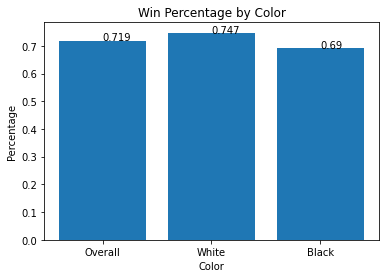

In [56]:
x = ['Overall','White','Black']
y = [winpercentage(cg.magnus_result.value_counts()),winpercentage(cg[cg.white=='Magnus Carlsen'].magnus_result.value_counts()),winpercentage(cg[cg.black=='Magnus Carlsen'].magnus_result.value_counts())]
plt.bar(x,y)
plt.title('Win Percentage by Color')
plt.xlabel('Color')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

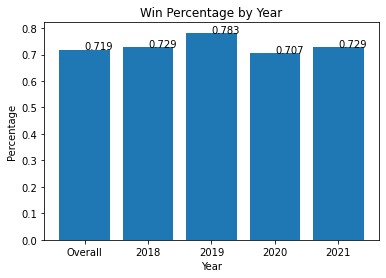

In [54]:
x = ['Overall','2018','2019','2020','2021']
y = [winpercentage(cg.magnus_result.value_counts()),winpercentage(cg[cg.utc_date.str[0:4]=='2018'].magnus_result.value_counts()),winpercentage(cg[cg.utc_date.str[0:4]=='2019'].magnus_result.value_counts()),winpercentage(cg[cg.utc_date.str[0:4]=='2020'].magnus_result.value_counts()),winpercentage(cg[cg.utc_date.str[0:4]=='2021'].magnus_result.value_counts())]
plt.bar(x,y)
plt.title('Win Percentage by Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

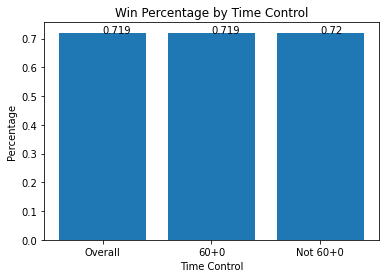

In [57]:
# 85% of games are 60+0, 6% of games are 180+0 and other time controls are even lower, will change or remove
x = ['Overall','60+0','Not 60+0']
y = [winpercentage(cg.magnus_result.value_counts()),winpercentage(cg[cg.time_control=='60+0'].magnus_result.value_counts()),winpercentage(cg[cg.time_control!='60+0'].magnus_result.value_counts())]
plt.bar(x,y)
plt.title('Win Percentage by Time Control')
plt.xlabel('Time Control')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

In [ ]:
for index, value in enumerate():
    plt.text(index, value,
             str(round(value,3)))
plt.show()

In [49]:
for i,v in enumerate([0,2,4,6]):
    print(i,v)

0 0
1 2
2 4
3 6


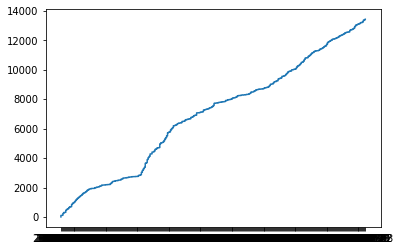

In [12]:
plt.plot(cg.utc_date,cg.index)